In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
data=pd.read_csv('./heartdata.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
#Key Statistics
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB
None
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000 

In [4]:
#Tukey Method

# import required libraries
from collections import Counter

# Outlier detection 
def detect_outliers(df,n,features):
    
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# List of Outliers
Outliers_to_drop = detect_outliers(data.drop('target',axis=1),0,list(data.drop('target',axis=1)))
data.drop('target',axis=1).loc[Outliers_to_drop]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 14 columns):
age         228 non-null int64
sex         228 non-null int64
cp          228 non-null int64
trestbps    228 non-null int64
chol        228 non-null int64
fbs         228 non-null int64
restecg     228 non-null int64
thalach     228 non-null int64
exang       228 non-null int64
oldpeak     228 non-null float64
slope       228 non-null int64
ca          228 non-null int64
thal        228 non-null int64
target      228 non-null int64
dtypes: float64(1), int64(13)
memory usage: 25.0 KB


Class Split
1    132
0     96
Name: target, dtype: int64


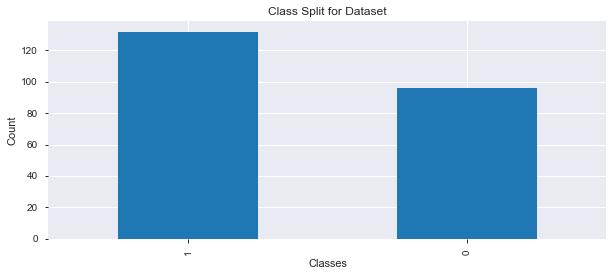

In [5]:
#Create New Dataset without Outliers
good_data = data.drop(data.index[Outliers_to_drop]).reset_index(drop = True)
good_data.info()

# importing package
import pandas_profiling as pp
from IPython.display import IFrame

# Profile Report
reportdata = pp.ProfileReport(good_data)
reportdata.to_file('2204Final.html')
display(IFrame('2204Final.html', width=900, height=350))

#Class Balance
print('Class Split')
print(good_data['target'].value_counts())
good_data['target'].value_counts().plot.bar(figsize=(10,4),title='Class Split for Dataset')
plt.xlabel('Classes')
plt.ylabel('Count')


#Prepare for Models for Comparison

#Create x and y variables
x = good_data.drop('target', axis=1).values
Y = good_data['target'].values

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_trainfs = sc.fit_transform(x_train)
x_testfs = sc.fit_transform(x_test)

In [6]:
#Feature Selection using SelectFromModel
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver='liblinear',penalty='l1',class_weight='balanced',random_state=100)
clf.fit(x_testfs,y_test)
model = SelectFromModel(clf, prefit=True)
feature_idx = model.get_support()
feature_name = good_data.drop('target',axis=1).columns[feature_idx]
print('\nKey Features:',feature_name)


Key Features: Index(['sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'exang', 'ca',
       'thal'],
      dtype='object')


In [7]:
#Prepare for Models for Comparison

#Create x and y variables
x2 = good_data[['sex', 'cp', 'trestbps', 'chol', 'restecg',
       'thalach', 'exang','ca','thal']].values
Y2 = good_data['target'].values

#Load Library for Training
from sklearn.model_selection import train_test_split
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,Y2,test_size = 0.2,stratify=Y2,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train2,y_train2)

#Scale the Data
x_train3 = sc.fit_transform(x_train_smt)
x_test3 = sc.fit_transform(x_test2)

x_2 = sc.fit_transform(x2)

In [8]:
# Import Models
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier

#Import Boosting models
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier 
from xgboost import XGBClassifier

#Create Pipeline
from sklearn.pipeline import Pipeline

pipeline =[]

pipe_dt = Pipeline([('scl', StandardScaler()),
                     ('clf', DecisionTreeClassifier(random_state=100))])

pipeline.insert(0,pipe_dt)

pipe_rdf = Pipeline([('scl', StandardScaler()),
                    ('clf', RandomForestClassifier(n_estimators=100,random_state=100))])
pipeline.insert(1,pipe_rdf)

pipe_et = Pipeline([('scl', StandardScaler()),
                    ('clf', ExtraTreesClassifier(n_estimators=100,random_state=100))])
pipeline.insert(2,pipe_et)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(class_weight='balanced',
                                               random_state=100))])
pipeline.insert(3,pipe_logreg)


# Set grid search params 

modelpara =[]

max_depth = range(1,100)
param_griddt = {'clf__criterion':['gini','entropy'],
                'clf__max_depth':max_depth}
modelpara.insert(0,param_griddt)

param_gridrdf = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(1,param_gridrdf)

param_gridet = {
            'clf__n_estimators': [100,150,200],
            'clf__max_features': ['auto', 'log2', 'sqrt'],
            'clf__bootstrap': [True, False]}
modelpara.insert(2,param_gridet)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l1'],
                   'clf__solver':['liblinear']}
modelpara.insert(3,param_gridlogreg)

In [9]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, n_jobs=-1, cv=cv2)
    gs_clf = gs_clf.fit(x_train3, y_train_smt)
    model = gs_clf.best_estimator_
    
    #Nested CV
    scoreACC = cross_val_score(gs_clf, x_2, Y2, 
                             scoring='accuracy', cv=5,
                             n_jobs= -1)
    
    scorePM = cross_val_score(gs_clf, x_2, Y2, 
                             scoring='precision_weighted', cv=5,
                             n_jobs= -1)
    
    scoreRM = cross_val_score(gs_clf, x_2, Y2, 
                             scoring='recall_weighted', cv=5,
                             n_jobs= -1)
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test3)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Heading
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\n')
    
    
    #Output Validation Statistics
    target_names=['0','1']
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test2,y_pred))  
    print('\n',classification_report(y_test2,y_pred,target_names=target_names)) 
    print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
    print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
    print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))
    print('\n')
    
     #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test2)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()   


Optimized Model

Model Name: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')



Best Parameters: {'clf__criterion': 'entropy', 'clf__max_depth': 3}

 [[15  4]
 [ 3 24]]

               precision    recall  f1-score   support

           0       0.83      0.79      0.81        19
           1       0.86      0.89      0.87        27

    accuracy                           0.85        46
   macro avg       0.85      0.84      0.84        46
weighted avg       0.85      0.85      0.85        46


NestedCV Accuracy(weighted) :0.78 +/-0.04 
NestedCV Precision(weighted) :0.79 +/-0.05 
NestedCV Recall(weighted) :0.78 +/-0.04 


ROC Curve


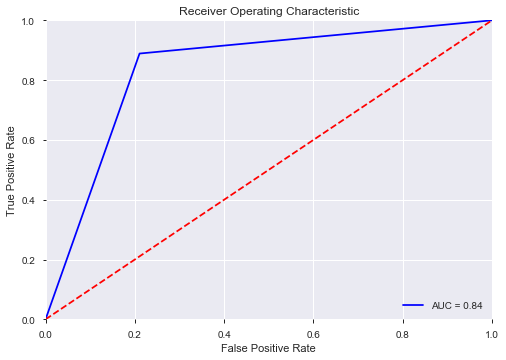


Optimized Model

Model Name: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)



Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 200}

 [[16  3]
 [ 5 22]]

               precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.88      0.81      0.85        27

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46


NestedCV Accuracy(weighted) :

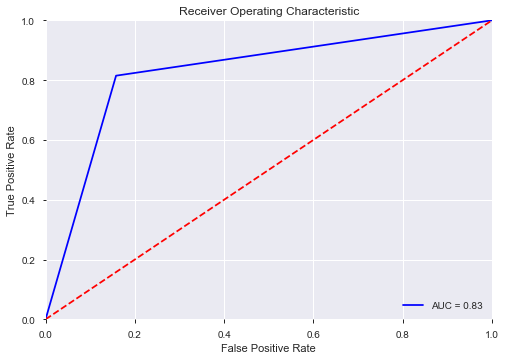


Optimized Model

Model Name: ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=100, verbose=0,
                     warm_start=False)



Best Parameters: {'clf__bootstrap': True, 'clf__max_features': 'auto', 'clf__n_estimators': 200}

 [[16  3]
 [ 5 22]]

               precision    recall  f1-score   support

           0       0.76      0.84      0.80        19
           1       0.88      0.81      0.85        27

    accuracy                           0.83        46
   macro avg       0.82      0.83      0.82        46
weighted avg       0.83      0.83      0.83        46


NestedCV Accuracy(weighted) :0.80 +/-0.04 

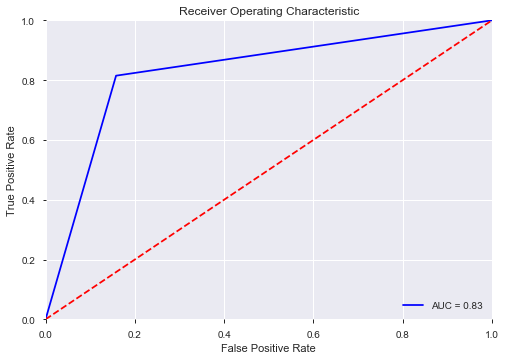


Optimized Model

Model Name: LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=100, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)



Best Parameters: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}

 [[16  3]
 [ 4 23]]

               precision    recall  f1-score   support

           0       0.80      0.84      0.82        19
           1       0.88      0.85      0.87        27

    accuracy                           0.85        46
   macro avg       0.84      0.85      0.84        46
weighted avg       0.85      0.85      0.85        46


NestedCV Accuracy(weighted) :0.82 +/-0.05 
NestedCV Precision(weighted) :0.83 +/-0.04 
NestedCV Recall(weighted) :0.82 +/-0.05 


ROC Curve


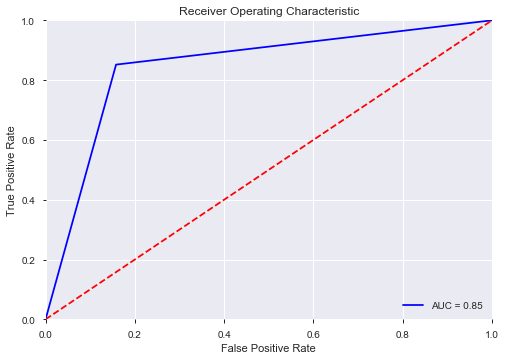

In [10]:
#Run Models
for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)

In [11]:
#Create Voting Model
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_validate

estimators = []

model1 = LogisticRegression(solver='liblinear',class_weight='balanced',
                            random_state=100)
estimators.append(('Logistic', model1))

model2 = RandomForestClassifier(n_estimators=100,random_state=100)
estimators.append(('Random Forest', model2))

model3 = BaggingClassifier(random_state=100)
estimators.append(('Bagging Classifier', model3))

voting_clf=VotingClassifier(estimators,voting='soft')

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_macro': 'recall_macro'}
print('\nVoting Model')
for clf in (model1,model2,model3,voting_clf):
    rkfcv= clf.fit(x_train3,y_train_smt)
    ens_rkf1 = RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    rKFcv = cross_validate(rkfcv, x_2, Y2, scoring=scoring, cv=ens_rkf1)
    print(clf.__class__.__name__,round(rKFcv['test_rec_macro'].mean(),2))   


Voting Model
LogisticRegression 0.82
RandomForestClassifier 0.8
BaggingClassifier 0.77
VotingClassifier 0.8


In [12]:
#Gridsearch Setup
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#Cross Validation
cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)

#Parameter Grid
param_grid = [{'Logistic__C': [0.01, 0.1, 1, 10, 100],
               'Logistic__penalty': ['l1', 'l2']}]

param_grid2 = [{'meta_classifier__C': [0.01, 0.1, 1, 10, 100],
               'meta_classifier__penalty': ['l1', 'l2']}]

In [13]:
#Gridsearch - Voting

gs = GridSearchCV(estimator=voting_clf, 
                  param_grid=param_grid, 
                  scoring='accuracy', cv=cv2)

gs_clf = gs.fit(x_train3,y_train_smt)

model = gs_clf.best_estimator_

#Nested CV
scoreACC = cross_val_score(gs_clf, x_2, Y2,scoring='accuracy', 
                           cv=5,n_jobs= -1)
    
scorePM = cross_val_score(gs_clf, x_2, Y2,scoring='precision_weighted', 
                          cv=5,n_jobs= -1)
    
scoreRM = cross_val_score(gs_clf, x_2, Y2,scoring='recall_weighted', 
                          cv=5, n_jobs= -1)

# Use best model and test data for final evaluation
y_pred = model.predict(x_test3)
    
#Identify Best Parameters to Optimize the Model
bestpara=str(gs_clf.best_params_)

print('\nOptimized Voting Classifier')
print('\nBest Parameters:',bestpara)
print('\nNestedCV Accuracy(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreACC),np.std(scoreACC)))
print('NestedCV Precision(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scorePM),np.std(scorePM)))
print('NestedCV Recall(weighted) :{:0.2f} +/-{:0.2f} '.format(np.mean(scoreRM),np.std(scoreRM)))


Optimized Voting Classifier

Best Parameters: {'Logistic__C': 10, 'Logistic__penalty': 'l2'}

NestedCV Accuracy(weighted) :0.81 +/-0.05 
NestedCV Precision(weighted) :0.81 +/-0.05 
NestedCV Recall(weighted) :0.81 +/-0.05 
